In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the datasets
confirmed = pd.read_csv("C:time_series_covid19_confirmed_global.csv")
death = pd.read_csv("C:time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("C:time_series_covid19_recovered_global.csv")

In [3]:
# Shape of all dataframes
print(confirmed.shape)
print(death.shape)
print(recovered.shape)

(266, 178)
(266, 178)
(253, 178)


In [4]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,826,864,898,920,936,957,971,994,1010,1012
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,74,76,79,81,83,83,85,89,93,95
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,946,952,959,968,978,988,996,1004,1011,1018
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19,19,19,21,21,22,23,23,26,26


In [5]:
# Preparing the dataset
def stat_maker(confirmed, death, recovered):
    """
    Takes confirmed, death and recovered dataframe as input.
    Calculate the total confirmed, death, recovered, active, new cases and mortality rates
    """
    # Extracting the dates
    date = death.keys()[4:]
    
    # Initialize required stat
    total_confirmed = []
    total_death = []
    total_recovered = []
    total_active = []
    mortality_rate = []
    recovery_rate = []
    
    for i in date:
        total_confirmed.append(confirmed[i].sum())
        total_death.append(death[i].sum())
        total_recovered.append(recovered[i].sum())
        total_active.append(confirmed[i].sum() - death[i].sum() - recovered[i].sum())
        mortality_rate.append(death[i].sum() * 100 / confirmed[i].sum())
        recovery_rate.append(recovered[i].sum() * 100 / confirmed[i].sum())
        
    # Making the dataframe
    temp_dict = {"Date" : date,
                 "Confirmed" : total_confirmed,
                 "Death" : total_death,
                 "Recovered" : total_recovered,
                 "Active" : total_active,
                 "Mortality_rate" : mortality_rate,
                 "Recovery_rate" : recovery_rate}
    df_temp = pd.DataFrame(temp_dict)
    
    # Calculating new cases
    df_temp["New_case"] = df_temp["Confirmed"]
    for i in range(1, df_temp.shape[0]):
        df_temp["New_case"][i] = df_temp["Confirmed"][i] - df_temp["Confirmed"][i-1]
        
    # Filling NaN values with 0
    df_temp["Mortality_rate"].fillna(0, inplace = True)
    df_temp["Recovery_rate"].fillna(0, inplace = True)
    
    return(df_temp)

In [6]:
df_data = stat_maker(confirmed= confirmed, death= death, recovered= recovered)
df_data

,Date,Confirmed,Death,Recovered,Active,Mortality_rate,Recovery_rate,New_case
0,1/22/20,555,17,28,510,3.063063,5.045045,555
1,1/23/20,654,18,30,606,2.752294,4.587156,99
2,1/24/20,941,26,36,879,2.763018,3.825717,287
3,1/25/20,1434,42,39,1353,2.928870,2.719665,493
4,1/26/20,2118,56,52,2010,2.644004,2.455146,684
...,...,...,...,...,...,...,...,...
169,7/9/20,12268518,554924,6740124,4973470,4.523154,54.938372,227038
170,7/10/20,12498467,560209,6879521,5058737,4.482222,55.042918,229949
171,7/11/20,12717908,565138,7005299,5147471,4.443640,55.082164,219441
172,7/12/20,12910357,569128,7116957,5224272,4.408306,55.125950,192449


In [7]:
def stat_plotter(df_temp):
    """
    Takes a dataframe as input.
    Plots Confirmed, Deaths, Recovered and Active cases vs time
    Plots Mortality rate vs time
    """
    
    # Print total number of cases
    print(f"Total Confirmed Cases = {df_temp.Confirmed.iloc[-1]}")
    print(f"Total Deaths Reported = {df_temp.Death.iloc[-1]}")
    print(f"Total Recovered Cases = {df_temp.Recovered.iloc[-1]}")
    print(f"Total Active Cases = {df_temp.Active.iloc[-1]}")
    
    # Plotting the graph wrt time
    plt.style.use("ggplot")
    plt.figure(figsize = (20, 8))
    plt.plot(df_temp.Date, df_temp.Confirmed, label = "Confirmed", color = "salmon", linewidth = 2.5)
    plt.plot(df_temp.Date, df_temp.Death, label = "Deaths", color = "red", linewidth = 2.5)
    plt.plot(df_temp.Date, df_temp.Recovered, label = "Recoveries", color = "green", linewidth = 2.5)
    plt.plot(df_temp.Date, df_temp.Active, label = "Active", color = "blue", linewidth = 2.5)
    plt.title("COVID- 19 CASES WRT TIME", fontsize = 20, fontweight = "bold")
    plt.xlabel("DATE", fontsize = 15)
    plt.ylabel("NO. OF CASES", fontsize = 15)
    plt.legend(fontsize = 15)
    plt.xticks(rotation = 70)
    
    # Printing Mortality and recovery rate
    print("Mortality rate = "+str(round(df_temp.Mortality_rate.iloc[-1],2))+"%")
    print("recovery rate = "+str(round(df_temp.Recovery_rate.iloc[-1],2))+"%")
    
    # Plotting mortality and recovery
    plt.figure(figsize = (20, 8))
    plt.plot(df_temp.Date, df_temp.Mortality_rate, label = "Mortality Rate", color = "cyan", linewidth = 2.5)
    plt.plot(df_temp.Date, df_temp.Recovery_rate, label = "Recovery Rate", color = "lightgreen", linewidth = 2.5)
    plt.title("MORTALITY AND RECOVERY OVER TIME" ,fontsize = 20, fontweight = "bold")
    plt.xlabel("DATE", fontsize = 15)
    plt.ylabel("RATE IN  %", fontsize = 15)
    plt.legend(fontsize = 15)
    plt.xticks(rotation = 70)

Total Confirmed Cases = 13104391
Total Deaths Reported = 573003
Total Recovered Cases = 7257369
Total Active Cases = 5274019
Mortality rate = 4.37%
recovery rate = 55.38%


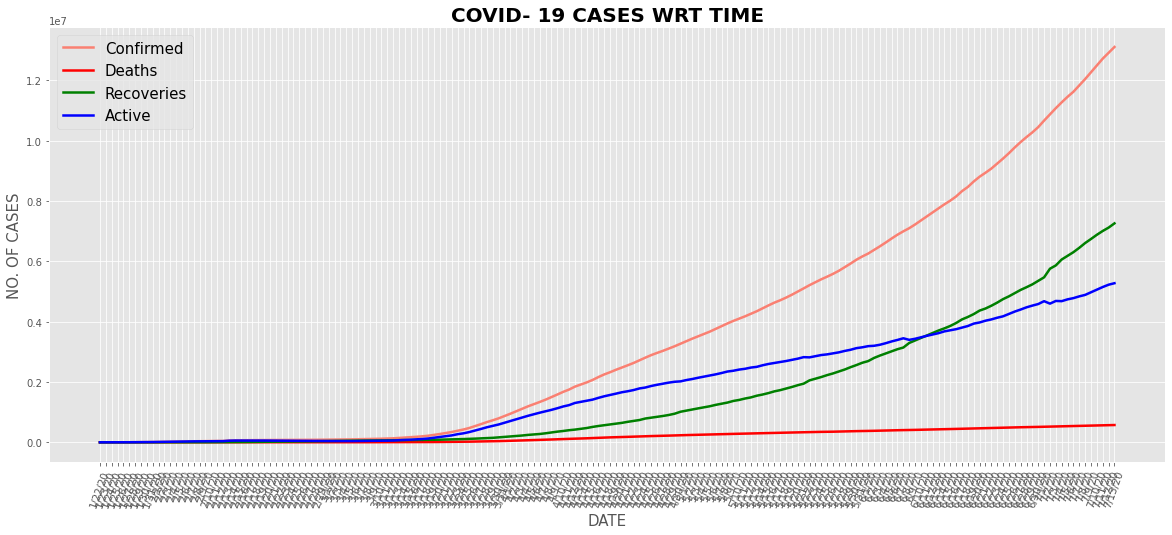

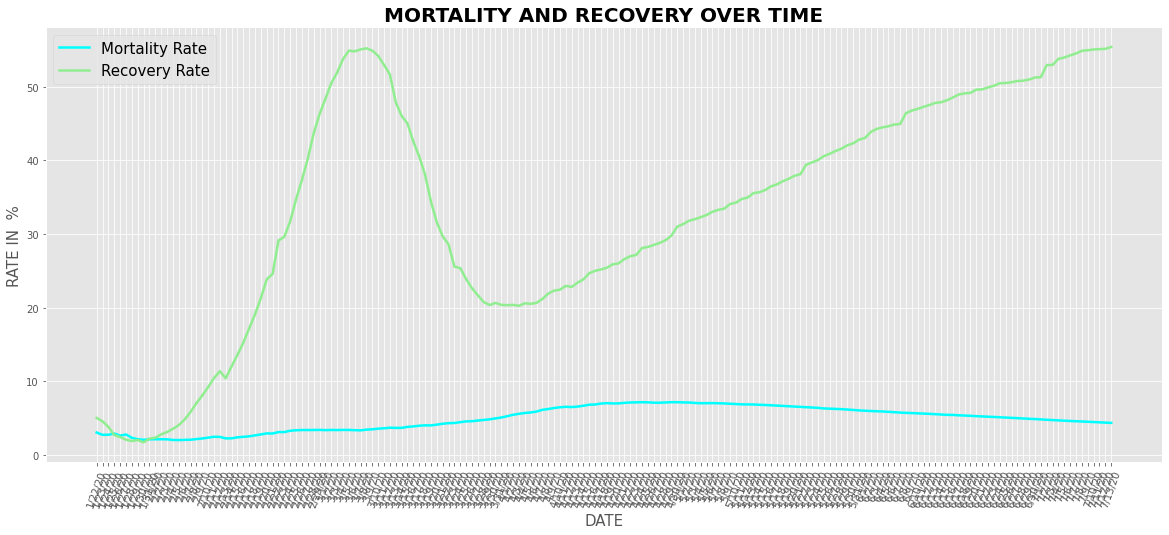

In [8]:
stat_plotter(df_data)

In [9]:
def daily_plotter(df_temp):
    """
    Takes a dataframe as input
    Plots the new daily cases reported
    """
    
    plt.style.use("ggplot")
    plt.figure(figsize = (20,8))
    plt.plot(df_temp.Date, df_temp.New_case, label = "New Cases", color = "yellow", linewidth = 1.5)
    plt.title("COVID - 19 DAILY CASES", fontsize = 20, fontweight = "bold")
    plt.xlabel("DATE", fontsize = 15)
    plt.ylabel("NO. OF CASES", fontsize = 15)
    plt.xticks(rotation = 70)
    plt.legend(fontsize = 15)

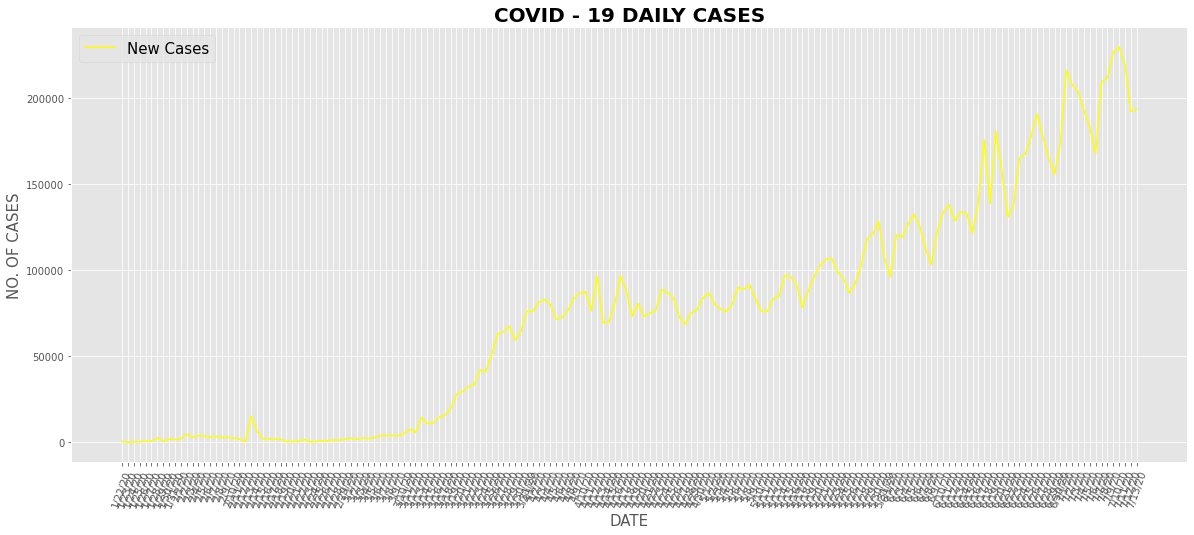

In [10]:
daily_plotter(df_data)

In [11]:
# Creating Country specific dataframe
def only_country(country_name):
    """
    Accepts a country name and returns the COVID-19 Datframe of the country
    """
    conf_cntry = confirmed[confirmed["Country/Region"] == country_name]
    death_cntry = death[death["Country/Region"] == country_name]
    rec_cntry = recovered[recovered["Country/Region"] == country_name]
    
    return(stat_maker(conf_cntry, death_cntry, rec_cntry))
    
    

In [12]:
india = only_country("India")
india

,Date,Confirmed,Death,Recovered,Active,Mortality_rate,Recovery_rate,New_case
0,1/22/20,0,0,0,0,0.000000,0.000000,0
1,1/23/20,0,0,0,0,0.000000,0.000000,0
2,1/24/20,0,0,0,0,0.000000,0.000000,0
3,1/25/20,0,0,0,0,0.000000,0.000000,0
4,1/26/20,0,0,0,0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
169,7/9/20,793802,21604,495513,276685,2.721585,62.422745,26506
170,7/10/20,820916,22123,515386,283407,2.694916,62.781819,27114
171,7/11/20,849522,22673,534618,292231,2.668913,62.931625,28606
172,7/12/20,878254,23174,553471,301609,2.638644,63.019468,28732


Total Confirmed Cases = 906752
Total Deaths Reported = 23727
Total Recovered Cases = 571460
Total Active Cases = 311565
Mortality rate = 2.62%
recovery rate = 63.02%


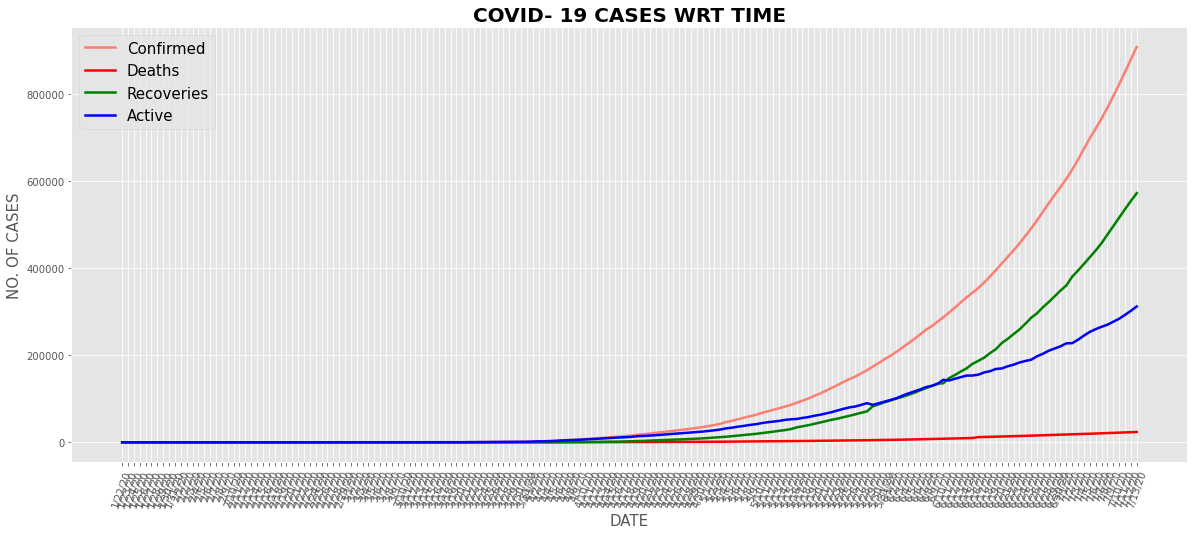

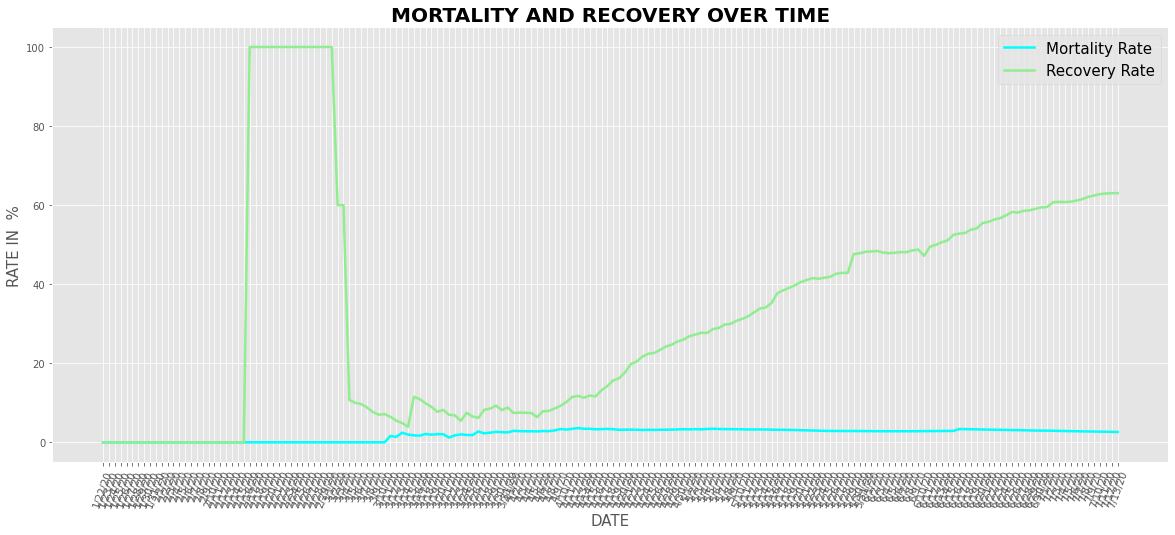

In [13]:
stat_plotter(india)

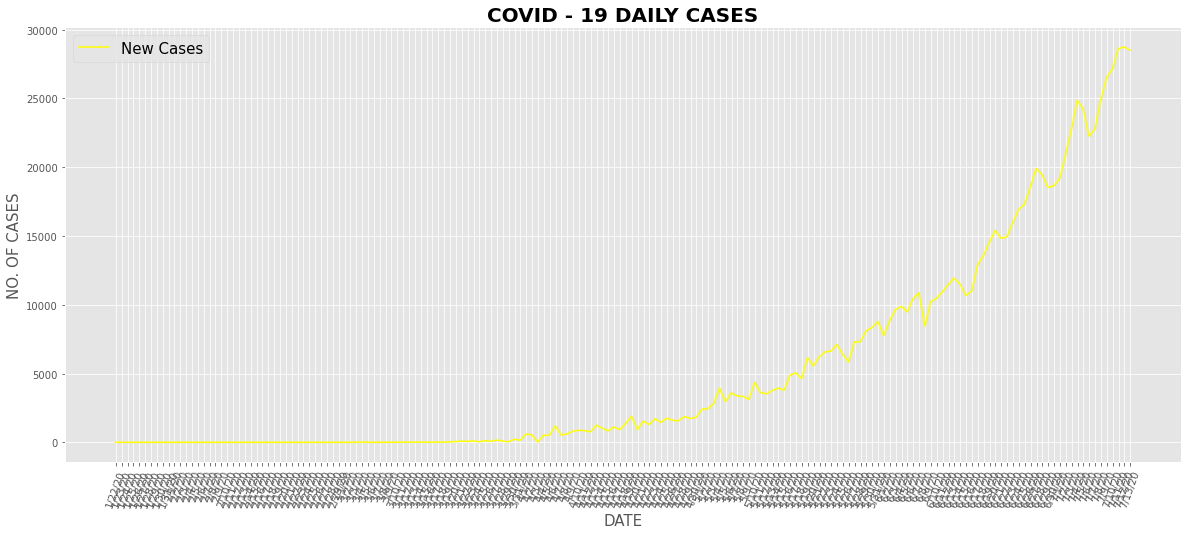

In [14]:
daily_plotter(india)

In [15]:
def top_ten(choice = "c", n = 7):
    """
    Accepts a dataframe and choice = c, d or r
    Returns top 10 countries
    """
    #for choice in ["c", "d", "r"]:
    if choice == "c":
        x = confirmed
        category = "CONFIRMED"
    elif choice == "d":
        x = death
        category = "DEATH"
    elif choice == "r":
        x = recovered
        category = "RECOVERED"
            
    df_cum = pd.DataFrame(data = np.array(x["Country/Region"]), columns = ["Country"], index = None)
    if n == 0:
        df_cum["Cases"] = x.iloc[:, -1] - 0
    else:
        df_cum["Cases"] = x.iloc[:, -1] -x.iloc[:, (-1-n)]
        
    unique_cntry = df_cum.Country.unique()
    final_list = []
    for cntry in unique_cntry:
        final_list.append(df_cum.Cases[df_cum["Country"] == cntry].sum())
            
    df_top_10 = pd.DataFrame(data = unique_cntry, columns = ["Unique_country"], index = None)
    df_top_10["New_case"] = final_list
    df_top_10.sort_values(by = ["New_case"], ascending = False, inplace = True)
        
    # Plotting the data
    plt.style.use("ggplot")
    plt.figure(figsize = (20,8))
    sns.barplot("Unique_country", "New_case", data = df_top_10.head(10))
    plt.title(f"TOTAL {category} CASES", fontsize = 20, fontweight = "bold")
    plt.xlabel("COUNTRIES", fontsize = 15)
    plt.ylabel("CASES", fontsize = 15)
        
    # Pie plot
    others = df_top_10.New_case.sum() - df_top_10.New_case.head(10).sum()
    cases = list(df_top_10.New_case.head(10))
    cases.append(others)
    country = list(df_top_10.Unique_country.head(10))
    country.append("Others")
        
    plt.figure(figsize = (10, 10))
    explode = (0,0,0,0,0,0,0,0,0,0,0.1)
    plt.pie(cases, labels = country, explode = explode, autopct = "%.2f%%", wedgeprops = dict(width = 0.5), startangle = 90)
    plt.title(f"TOTAL {category} CASES DISTRIBUTION IN WORLD", fontsize = 20, fontweight = "bold")
    
    return(df_top_10.head(10))

,Unique_country,New_case
156,US,59215
71,India,28498
21,Brazil,20286
137,South Africa,11554
124,Russia,6511
33,Colombia,5083
98,Mexico,4685
118,Peru,3797
81,Kazakhstan,3502
6,Argentina,3099


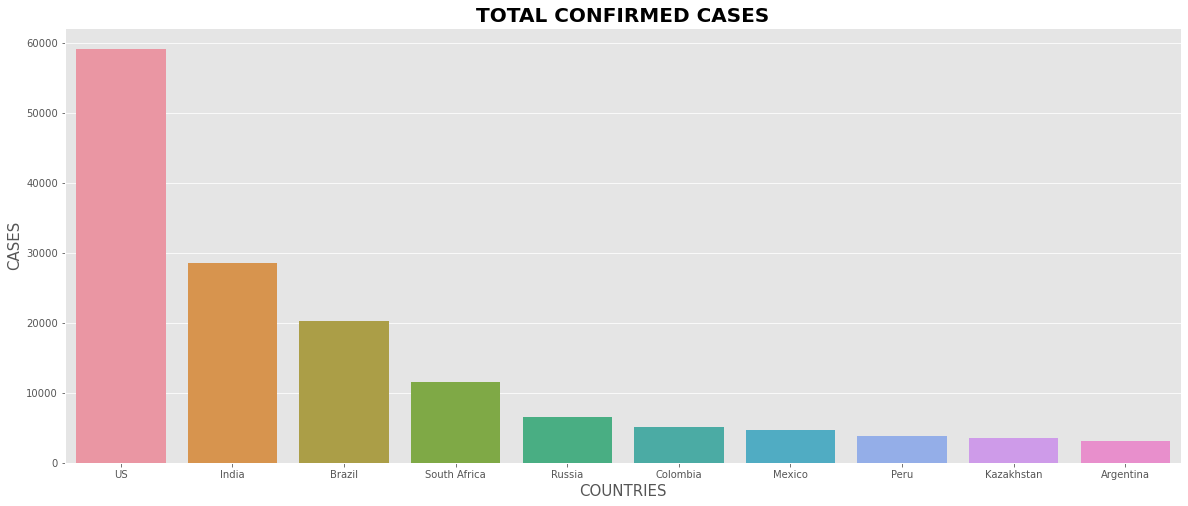

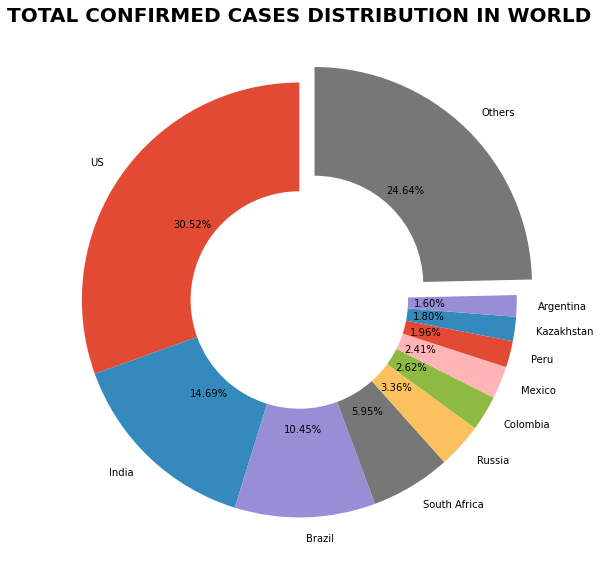

In [16]:
top_ten(choice = "c", n = 1)